# Network of Subset of genes

03/22/2022

Clelia Corridori

Considering all data together

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy.linalg as la

## DATA

In [2]:
path = "C:/Users/cleli/OneDrive - Università degli Studi di Padova/LAVORO/GeneNetwork/"
file_name = "geni_IMP.xlsx"
df = pd.read_excel(path + file_name)
df

,EnsemblGeneID,Symbol,GM_2iL_2,GM_2iL_1,GM_24h_2iL_2,GM_24h_2iL_1,GM_36h_2iL_2,GM_36h_2iL_1,GM_48h_2iL_2,GM_48h_2iL_1,...,GM_36h_2i_1,GM_36h_2i_2,GM_48h_2i_1,GM_48h_2i_2,GM_60h_2i_1,GM_60h_2i_2,GM_72h_2i_1,GM_72h_2i_2,GM_84h_2i_1,GM_84h_2i_2
0,ENSMUSG00000003032,Klf4,721.246075,790.448527,362.034812,507.580169,338.426474,275.595044,109.118435,141.201368,...,15.825195,7.814844,19.079327,14.208553,38.803582,25.553683,17.314668,14.762640,31.121266,16.477378
1,ENSMUSG00000055148,Klf2,300.890974,288.413501,124.602767,102.125740,87.270395,86.229124,51.552016,27.900029,...,25.056559,32.040862,42.928486,27.909658,39.896640,34.467758,16.527638,14.762640,13.103691,5.703708
2,ENSMUSG00000021255,Esrrb,179.939742,201.400614,103.999160,83.834562,47.694286,52.413781,24.916808,11.228061,...,3.956299,3.125938,4.769832,1.522345,2.186117,4.159902,3.148121,1.845330,1.637961,3.168726
3,ENSMUSG00000026380,Tfcp2l1,797.584148,796.803401,135.395133,111.271328,69.511885,70.166836,22.339207,18.713434,...,7.912597,5.470391,6.359776,6.089380,7.104881,7.725532,4.722182,9.226650,12.284710,8.238689
4,ENSMUSG00000018604,Tbx3,212.656059,258.105641,129.508388,110.509196,19.788055,30.011117,6.873602,4.423175,...,0.659383,2.344453,2.384916,4.567035,10.384057,8.914075,8.657334,11.994645,12.284710,12.041160
5,ENSMUSG00000004040,Stat3,104.593073,110.477036,100.074664,74.688974,64.438024,70.589528,56.707218,26.879297,...,8.571981,8.596329,14.309495,9.641518,12.570174,10.696891,15.740607,16.607970,26.207382,15.209887
6,ENSMUSG00000055799,Tcf7l1,214.143165,222.420581,311.016356,241.595966,190.269757,213.882044,190.312861,154.130650,...,211.002599,154.733920,189.998299,163.905809,119.689921,153.322098,108.610191,119.946449,126.942008,114.074152
7,ENSMUSG00000012396,Nanog,172.999918,155.938825,66.716442,45.727943,31.965319,23.670740,10.740003,6.124397,...,5.934448,4.688907,10.334635,10.148967,34.977876,26.147955,22.823881,23.989290,11.465730,7.604943
8,ENSMUSG00000027547,Sall4,158.624566,155.449989,259.997900,187.484567,207.013495,222.758571,230.695273,224.561212,...,213.640131,202.404471,240.876504,231.396437,226.263139,209.183637,145.600618,144.858403,111.381375,116.609133
9,ENSMUSG00000024406,Pou5f1,72.372458,76.258485,62.791946,113.557725,111.117538,93.837576,76.039224,121.807446,...,60.663247,55.485396,54.058093,63.431041,43.175816,39.221932,18.101698,28.602615,16.379614,1.901236


In [3]:
col_names = np.array(df.columns)
# print(col_names)

col_names_2iL_1 = [col_names[3+2*i] for i in range(8)]
print(col_names_2iL_1)

col_names_2iL_2 = [col_names[2+2*i] for i in range(8)]
print(col_names_2iL_2)

col_names_2i_1 = [col_names[18+2*i] for i in range(8)]
print(col_names_2i_1)

col_names_2i_2 = [col_names[19+2*i] for i in range(8)]
print(col_names_2i_2)

['GM_2iL_1', 'GM_24h_2iL_1', 'GM_36h_2iL_1', 'GM_48h_2iL_1', 'GM_60h_2iL_1', 'GM_72h_2iL_1', 'GM_84h_2iL_1', 'GM_96h_2iL_1']
['GM_2iL_2', 'GM_24h_2iL_2', 'GM_36h_2iL_2', 'GM_48h_2iL_2', 'GM_60h_2iL_2', 'GM_72h_2iL_2', 'GM_84h_2iL_2', 'GM_96h_2iL_2']
['GM_2i_1', 'GM_12h_2i_1', 'GM_24h_2i_1', 'GM_36h_2i_1', 'GM_48h_2i_1', 'GM_60h_2i_1', 'GM_72h_2i_1', 'GM_84h_2i_1']
['GM_2i_2', 'GM_12h_2i_2', 'GM_24h_2i_2', 'GM_36h_2i_2', 'GM_48h_2i_2', 'GM_60h_2i_2', 'GM_72h_2i_2', 'GM_84h_2i_2']


In [4]:
df_2iL_1 = np.array(df.loc[:, col_names_2iL_1])
print("[# gene x # samples], set_1_2iL", df_2iL_1.shape)
df_2iL_2 = np.array(df.loc[:, col_names_2iL_2] )
print("[# gene x # samples], set_2_2iL", df_2iL_2.shape)
df_2iL = (df_2iL_1+df_2iL_2)/2
print("[# gene x # samples], set_all_2iL", df_2iL.shape)

df_2i_1 = np.array(df.loc[:, col_names_2i_1])
print("[# gene x # samples], set_1_2i", df_2iL_1.shape)
df_2i_2 = np.array(df.loc[:, col_names_2i_2] )
print("[# gene x # samples], set_2_2i", df_2iL_2.shape)
# df_2i = np.concatenate((df_2i_1,df_2i_2), 1)
df_2i = (df_2i_1+df_2i_2)/2
print("[# gene x # samples], set_all_2i", df_2i.shape)

# df_all = np.concatenate((df_2i, df_2iL), 1)
# print("\n \n [# gene x # samples], set_all_data", df_all.shape)

[# gene x # samples], set_1_2iL (24, 8)
[# gene x # samples], set_2_2iL (24, 8)
[# gene x # samples], set_all_2iL (24, 8)
[# gene x # samples], set_1_2i (24, 8)
[# gene x # samples], set_2_2i (24, 8)
[# gene x # samples], set_all_2i (24, 8)


In [5]:
def all_plot(data):
    plt.figure(figsize=(7,5))
    for ii in range(0, len(data)):
        plt.plot(time_2iL, data[ii,:], "-*", label=ii)
    plt.legend()
    plt.grid()
    plt.xlabel("time [h]")
    plt.ylabel("gene expression", rotation="vertical")
#     plt.ylim([0,1000])    
    plt.show()
    
def mean_plot(data, time, text):
    df_Mean = np.mean(data,0)
    df_std = np.std(data,0)
    
    plt.figure(figsize=(7,5))
    plt.plot(time, df_Mean, "-o",  color = "royalblue", lw = 2, label = "mean gene expression")
    plt.fill_between(time, df_Mean+df_std, df_Mean-df_std,
                     alpha = 0.3, color = "cornflowerblue", lw = 2)
    plt.title(text)
    plt.xlabel("time [h]")
    plt.ylabel("gene expression", rotation="vertical")
    


### 2i+LIF

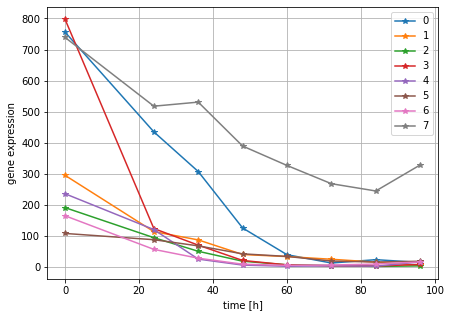

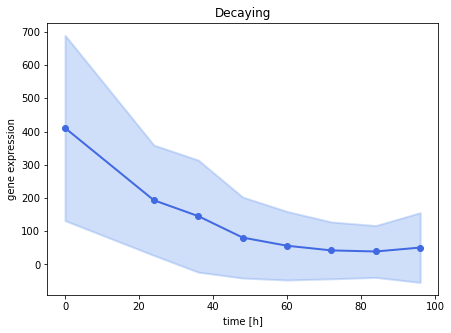

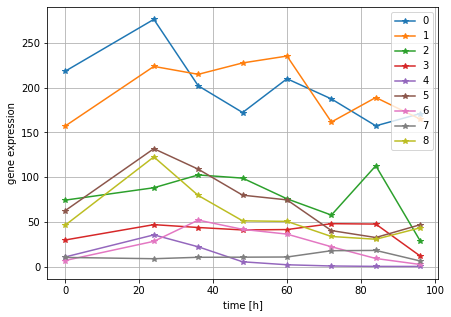

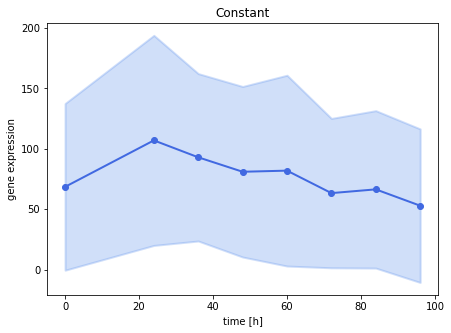

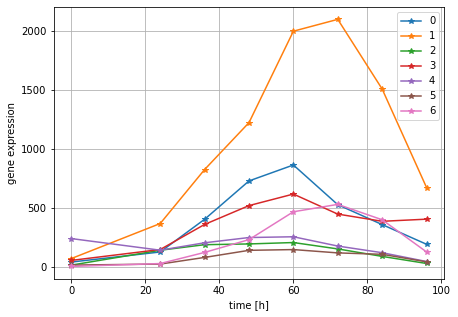

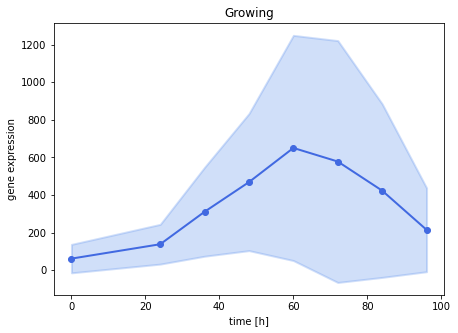

In [6]:
time_2iL = [0, 24, 36, 48, 60, 72, 84, 96]

df_type1 = df_2iL[[0,1,2,3, 4, 5, 7,10], :]
df_type2 = df_2iL[[6,8,9,16,17,18,20,21,23], :]
df_type3 = df_2iL[[11, 12, 13, 14, 15, 19, 22], :]

all_plot(df_type1)
mean_plot(df_type1, time_2iL, "Decaying")

all_plot(df_type2)
mean_plot(df_type2, time_2iL, "Constant")

all_plot(df_type3)
mean_plot(df_type3, time_2iL, "Growing")



### 2i

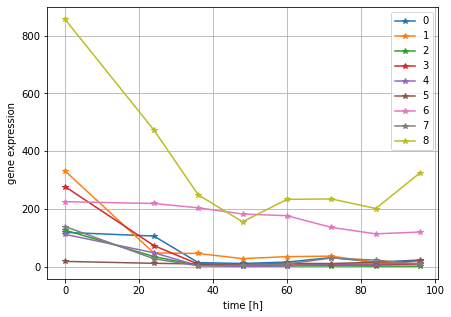

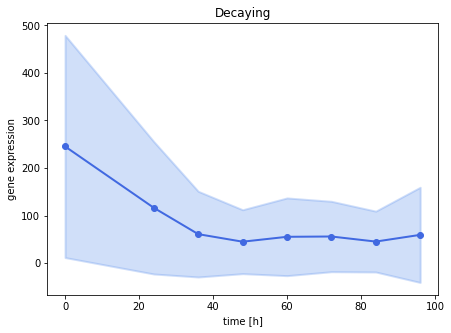

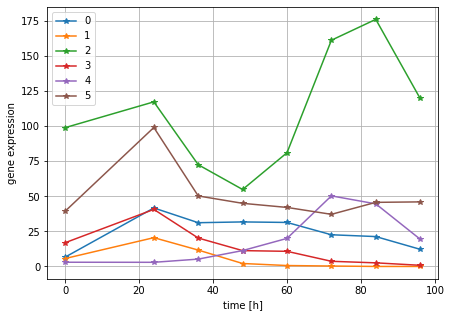

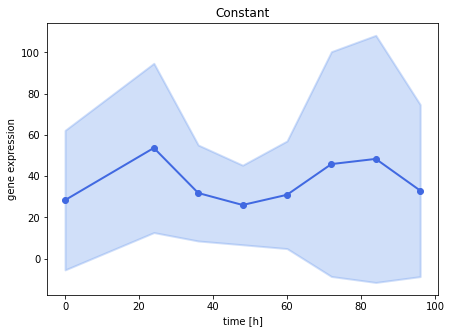

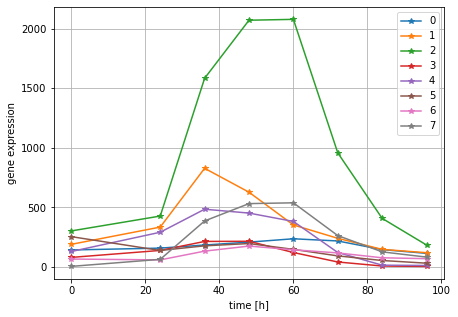

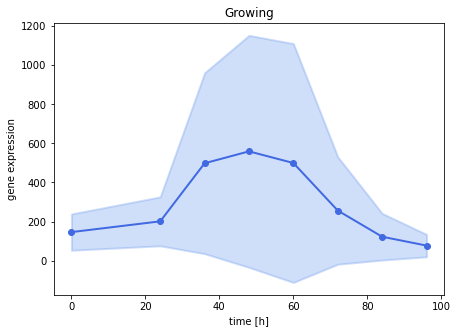

In [7]:
time_2i  = [0, 12, 24, 36, 48, 60, 72, 84]

df_type1 = df_2i[[0,1,2,3, 4, 5, 6,7,10], :]
df_type2 = df_2i[[16, 17, 18, 20, 21, 23], :]
df_type3 = df_2i[[8, 11, 12, 13, 14, 15, 19, 22], :]

all_plot(df_type1)
mean_plot(df_type1, time_2iL, "Decaying")

all_plot(df_type2)
mean_plot(df_type2, time_2iL, "Constant")

all_plot(df_type3)
mean_plot(df_type3, time_2iL, "Growing")

